# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices.

## Get the Data

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

## Data

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [3]:
BAC = data.DataReader("BAC",'stooq',start,end)
C = data.DataReader("C",'stooq',start,end)
GS = data.DataReader("GS",'stooq',start,end)
JPM = data.DataReader("JPM",'stooq',start,end)
MS = data.DataReader("MS",'stooq',start,end)

In [4]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS'],'stooq', start, end)

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS']
tickers.sort()

In [6]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS],axis=1,keys=tickers)

In [7]:
bank_stocks.head()

BAC                                                 C  \
               Open     High      Low    Close        Volume     Open   
Date                                                                    
2006-01-03  39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04  39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05  39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06  39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09  39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

                                                     ...      JPM           \
               High      Low    Close        Volume  ...     Open     High   
Date                                                 ...                     
2006-01-03  408.615  398.112  407.891  1.858097e+06  ...  28.7148  29.0970   
2006-01-04  406.325  400.089  400.354  2.260921e+06  ...  28.6824  28.9428   
2006-01-05  403.663  400.520  402.321  1.371893e+06  ...  28.5556  28.7030   
2006-01-06  404.641  398.865  402.321  1.655812e+06  ...  28.7846  29.0125   
2006-01-09  403.329  399.678  400.432  2.031072e+06  ...  28.7522  29.3593   

                                                 MS                    \
                Low    Close        Volume     Open     High      Low   
Date                                                                    
2006-01-03  28.3376  28.9771  1.780695e+07  37.4934  38.3558  37.2060   
2006-01-04  28.4201  28.5626  1.871252e+07  38.4971  38.8778  38.2675   
2006-01-05  28.4810  28.6520  1.118271e+07  38.2675  38.4264  38.0448   
2006-01-06  28.5164  28.8543  1.104151e+07  38.5432  38.5922  38.0703   
2006-01-09  28.7522  29.3229  2.298942e+07  38.4470  38.8846  38.4412   

                                   
              Close        Volume  
Date                               
2006-01-03  38.2361  6.806387e+06  
2006-01-04  38.2675  1.009857e+07  
2006-01-05  38.3715  7.313990e+06  
2006-01-06  38.4108  8.721337e+06  
2006-01-09  38.8120  5.246244e+06  

[5 rows x 25 columns]

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...      JPM           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  28.7148  29.0970   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  28.6824  28.9428   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  28.5556  28.7030   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  28.7846  29.0125   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  28.7522  29.3593   

Bank Ticker                                       MS                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   28.3376  28.9771  1.780695e+07  37.4934  38.3558  37.2060   
2006-01-04   28.4201  28.5626  1.871252e+07  38.4971  38.8778  38.2675   
2006-01-05   28.4810  28.6520  1.118271e+07  38.2675  38.4264  38.0448   
2006-01-06   28.5164  28.8543  1.104151e+07  38.5432  38.5922  38.0703   
2006-01-09   28.7522  29.3229  2.298942e+07  38.4470  38.8846  38.4412   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   38.2361  6.806387e+06  
2006-01-04   38.2675  1.009857e+07  
2006-01-05   38.3715  7.313990e+06  
2006-01-06   38.4108  8.721337e+06  
2006-01-09   38.8120  5.246244e+06  

[5 rows x 25 columns]

# EDA

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
dtype: float64

In [11]:
returns = pd.DataFrame()

In [12]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445


D:\Python\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



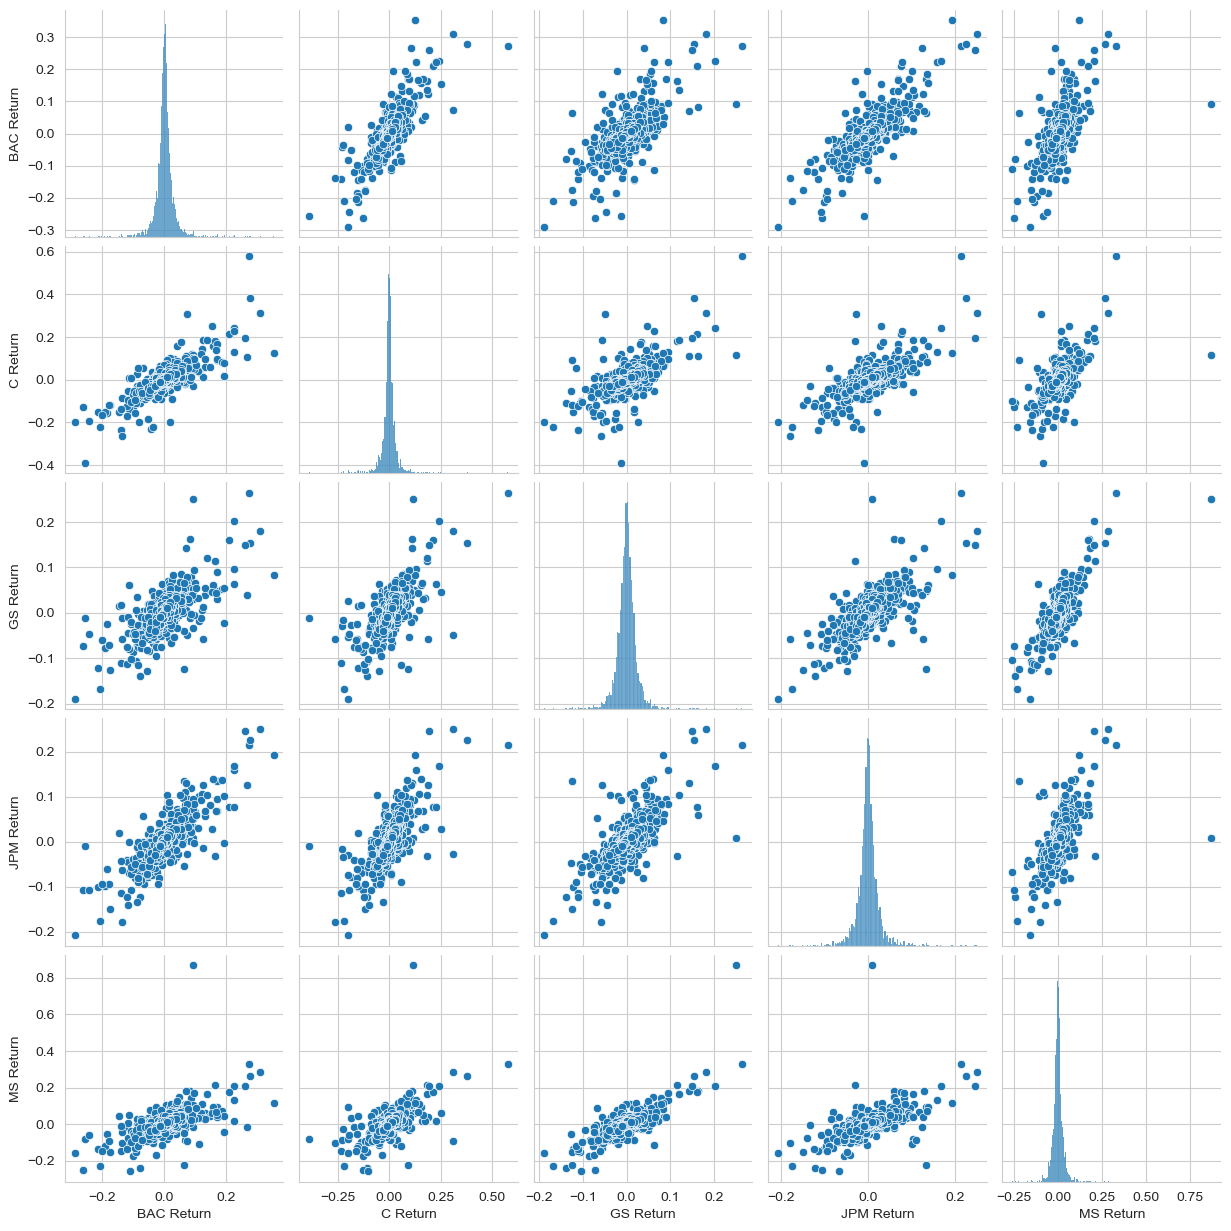

In [13]:
sns.pairplot(returns[1:])

In [14]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
dtype: datetime64[ns]

In [15]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
dtype: datetime64[ns]

In [16]:
returns.std()

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
dtype: float64

C:\Users\kevin\AppData\Local\Temp\ipykernel_12300\1960598734.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='MS Return', ylabel='Density'>

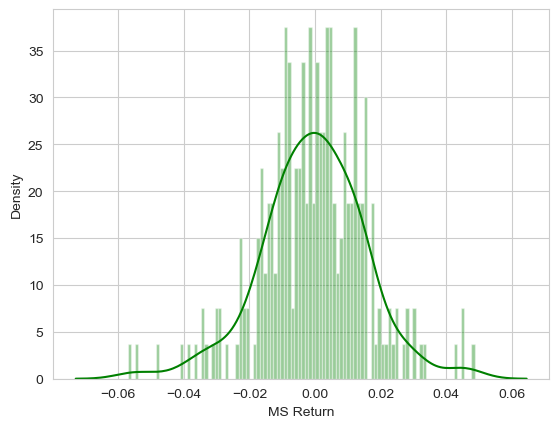

In [17]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

C:\Users\kevin\AppData\Local\Temp\ipykernel_12300\1612079653.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='C Return', ylabel='Density'>

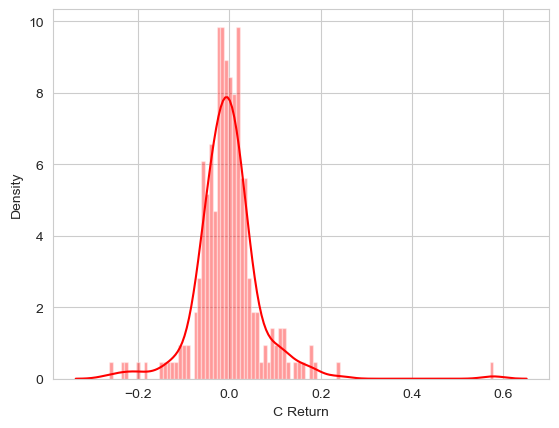

In [18]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

____
# Extra Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

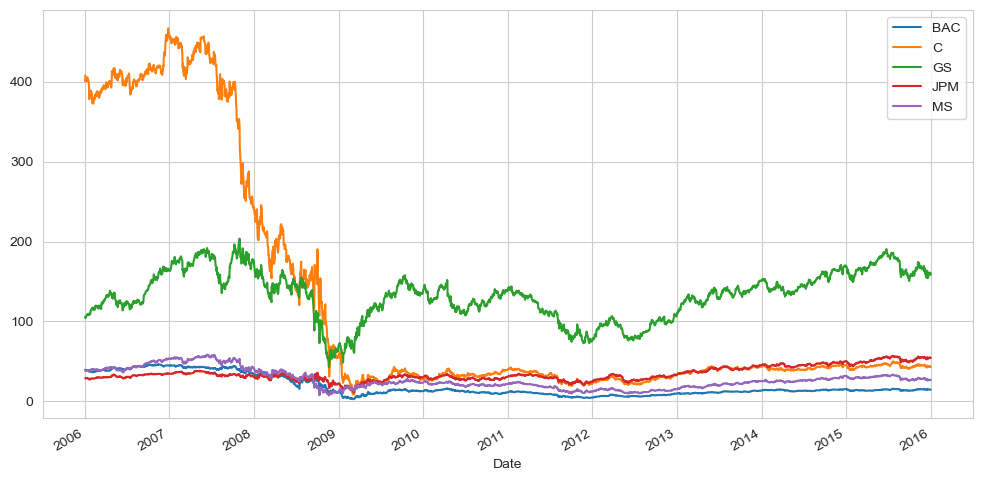

In [20]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,6),label=tick)
plt.legend()

<Axes: xlabel='Date'>

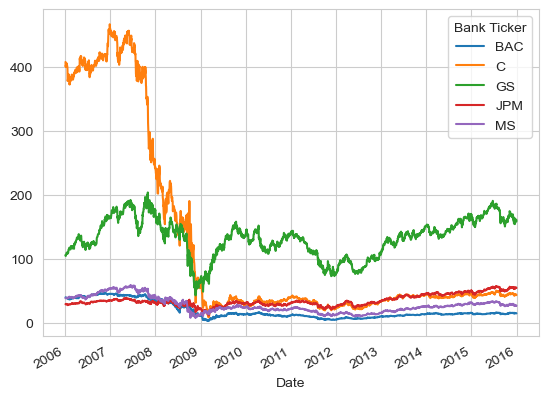

In [21]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

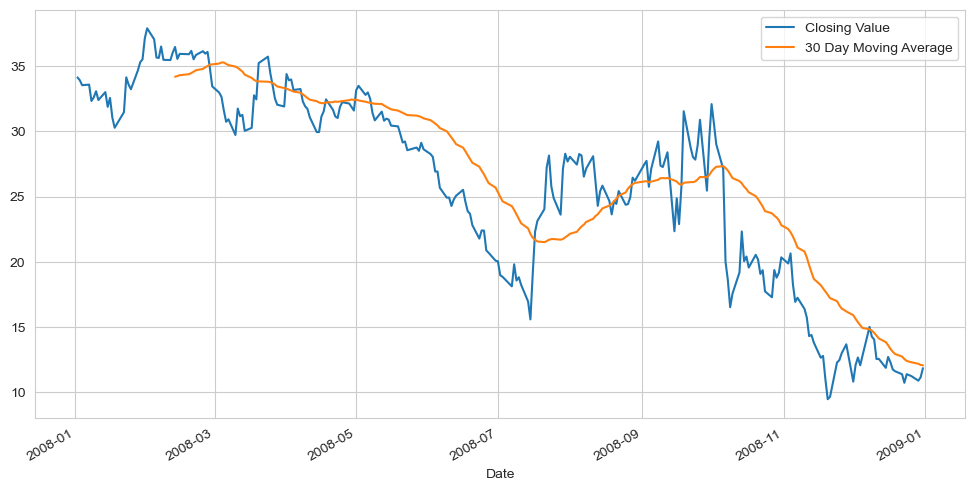

In [23]:
plt.figure(figsize=(12,6))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].plot(label='Closing Value')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 Day Moving Average')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

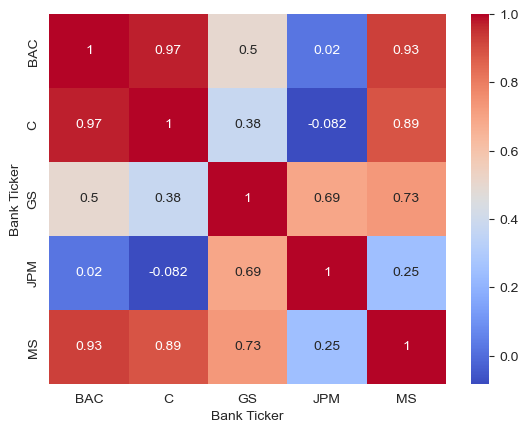

In [24]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='coolwarm')

In [25]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr().iplot(kind='heatmap',colorscale='rdylbu')

In [26]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')